# Multiple Linear Regression

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load Dataset

In [2]:
df = pd.read_csv('Student_Performance.csv')

## Exploratory Data Analysis

In [3]:

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Shape of the data (rows, columns)
df.shape

(10000, 6)

In [5]:
# Quick look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
# Check for missing values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().any(), df.duplicated().sum()

(np.True_, np.int64(127))

In [8]:
# Drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.shape

(9873, 6)

In [10]:
# Quick summary statistics
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Data Preprocessing

In [12]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [13]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [14]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Data Visualization

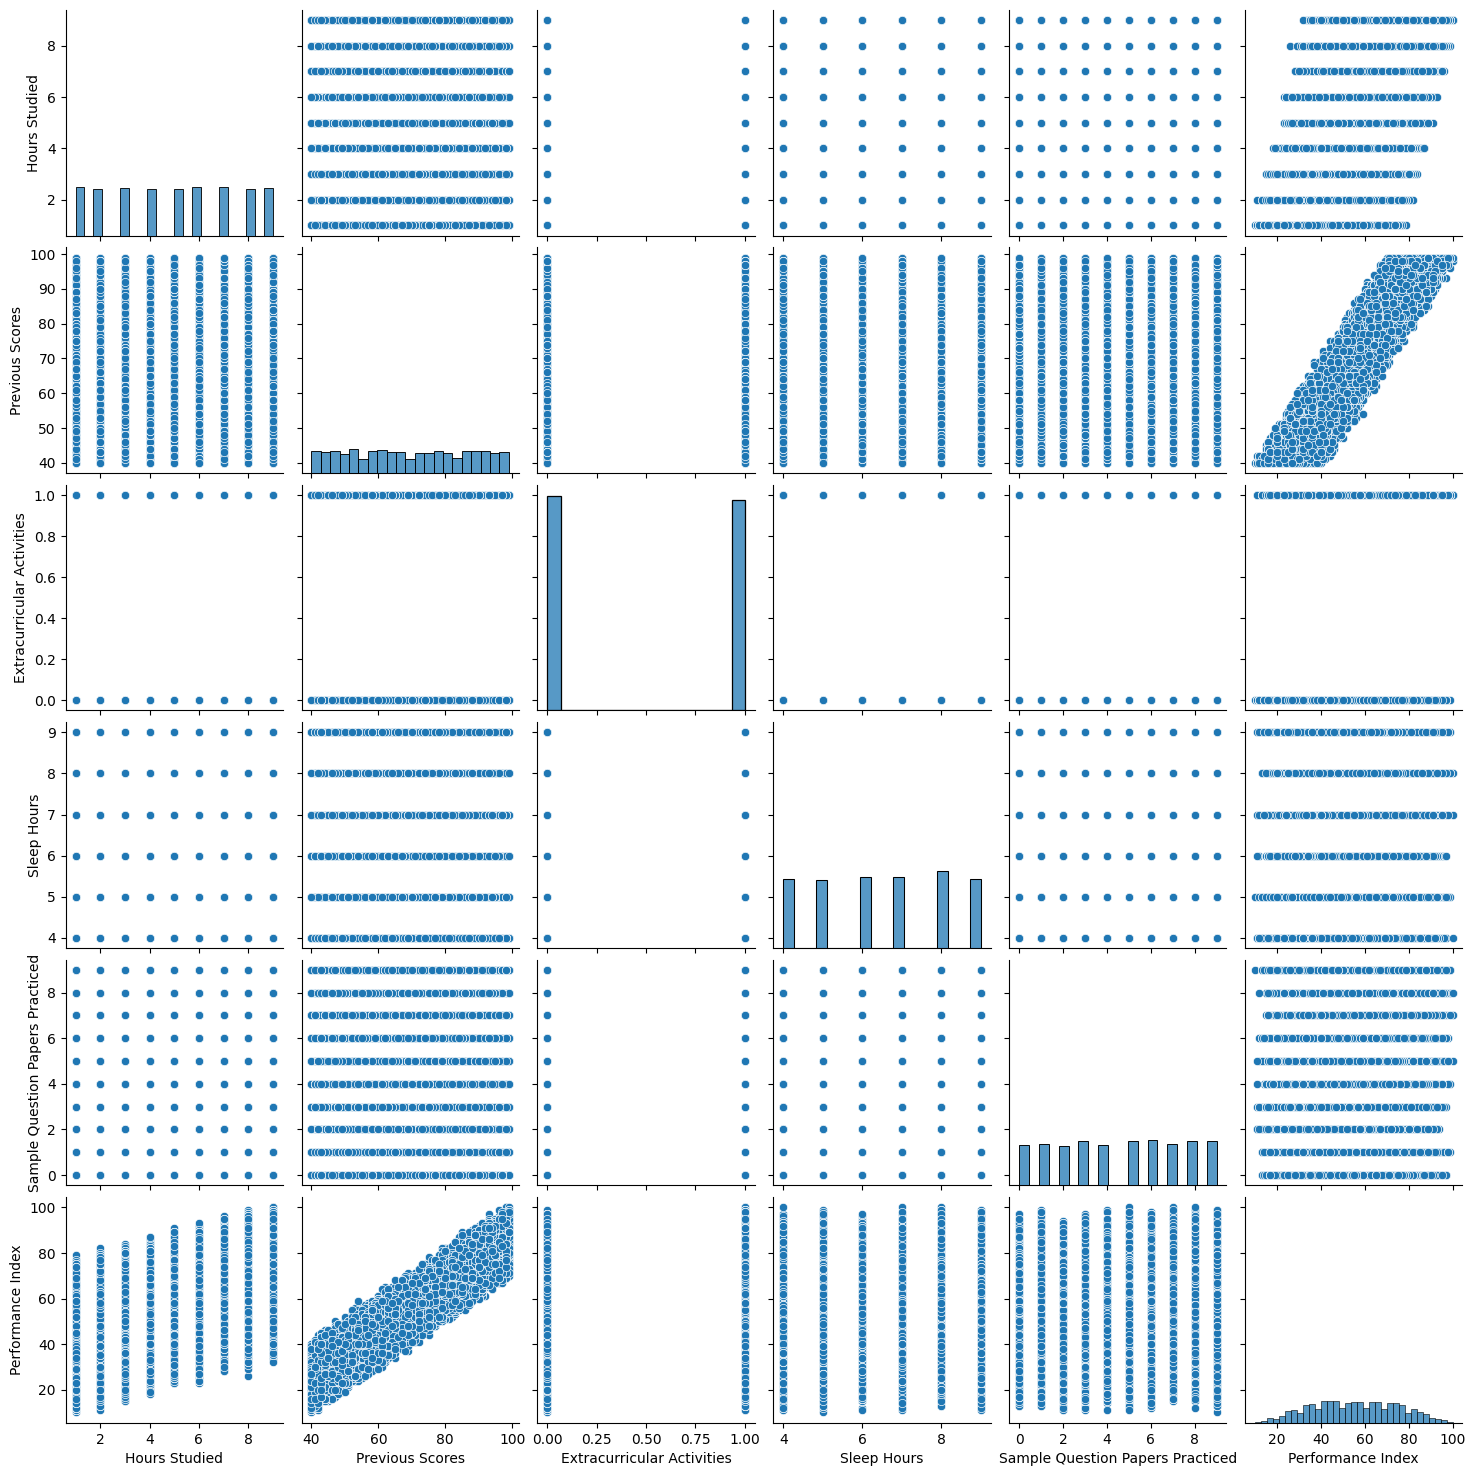

In [15]:
sns.pairplot(df)

## Data Splitting

In [16]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [17]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Number of samples in the training and testing sets
len(X_train), len(y_train), len(X_test), len(y_test)

(7898, 7898, 1975, 1975)

## Model Training

In [20]:
# Create a linear regression model
model = LinearRegression()
model

LinearRegression()

In [21]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

## Model Evaluation

In [23]:
# Evaluate the model using the R^2 score
model_1_score = r2_score(y_test, y_pred)
model_1_score

0.9884301209927054

## Feature Selection

In [24]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [25]:
# Drop columns that are not important
new_df = df.drop(['Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'], axis=1)
new_df.head()

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0


## Data Spliting and Modeling

In [26]:
# Split the data into features and target
X_df = df.drop('Performance Index', axis=1)
y_df = df['Performance Index']

In [27]:
# Split the data into training and testing sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
len(X_train_df), len(y_train_df), len(X_test_df), len(y_test_df)

(7898, 7898, 1975, 1975)

In [28]:
# Create a linear regression model
model_df = LinearRegression()
model_df.fit(X_train_df, y_train_df)

LinearRegression()

In [29]:
# Make predictions
y_pred_df = model_df.predict(X_test_df)
y_pred_df

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

## Model Accuracy

In [30]:
# Evaluate the model using the R^2 score
model_2_score = r2_score(y_test_df, y_pred_df)
model_2_score

0.9884301209927054

## Result

In [31]:
Results = pd.DataFrame({'Model': ['Model 1', 'Model 2'], 'R^2 Score': [model_1_score, model_2_score]})
Results

,Model,R^2 Score
0,Model 1,0.98843
1,Model 2,0.98843


## Conclusion

The accuracy of Model is same before and after feature selection. So, we can use the model with feature selection to reduce the complexity of the model.